In [18]:
import librosa
import numpy as np
from os import listdir
from os.path import isfile, join
from librosa import display
import random
from numpy import random

In [19]:
instruments=["clap","closedHiHats","cymbal","kick","openHiHats","rim","shaker","snare","tom"]
weights=[0.05,0.08,0,0.04,0.35,0.07,0.05,0.05,0.06]
instrument_="cymbal"
sr=22050

In [20]:
sum(weights)

0.7500000000000002

0.7500000000000002

In [21]:
mypath='/Users/romainbourgeois/Desktop/malisProject/data/'+instrument_+'/train/true/'
train = [f for f in listdir(mypath) if isfile(join(mypath, f))]
if '.DS_Store' in train:
    train.remove('.DS_Store')
positif=[]
for i in range(len(train)):
    y, sr=librosa.load(mypath+train[i], sr=22050, mono=True)
    positif.append(y)
    
l=len(positif[0])
nt=len(train)
mypath='/Users/romainbourgeois/Desktop/malisProject/data/'+instrument_+'/test/true/'
test = [f for f in listdir(mypath) if isfile(join(mypath, f))]
if '.DS_Store' in test:
    test.remove('.DS_Store')
n=len(test)+nt

# # Inspect distribution of padding in training data

In [22]:
def energy_cdf(y):
    y=y**2
    z=np.cumsum(y, dtype=float)/np.sum(y)
    return z

In [23]:
energy=np.zeros((len(positif),len(positif[0])))  #store energy cdf for the series
p=0
for i in positif:
    energy[p]=energy_cdf(i)
    p=p+1 

In [24]:
save=[]
for i in energy:
    p=0
    j=i[p]
    while j<0.001:
        p=p+1
        j=i[p]
    save.append(p)

<AxesSubplot:ylabel='Count'>

<AxesSubplot:ylabel='Count'>

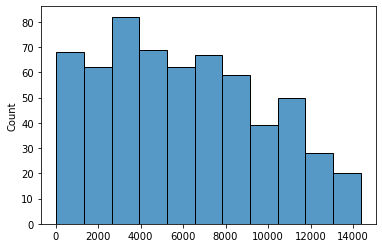

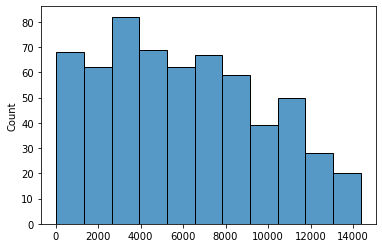

In [25]:
import seaborn as sns
from math import log
sns.histplot(save)

In [26]:
mean=np.mean(save)
std=np.std(save)

In [27]:
def remove_outliers(n):
    if n<0:
        n=0
    elif n>round(0.75*l):
        n=round(0.75*l)
    else:
        n=n
    return n

# import false data

In [28]:
datasettrain=[]
for i in range(len(instruments)):
    mypathtrain='/Users/romainbourgeois/Desktop/malisProject/layered_data/'+instruments[i]+'/train/'
    sample = [f for f in listdir(mypathtrain) if isfile(join(mypathtrain, f))]
    if '.DS_Store' in sample:
        sample.remove('.DS_Store')
    if round(weights[i]*nt)>0:  
        indtrain=np.random.randint(0, high=len(sample), size=round(weights[i]*nt))   
        for v in indtrain:
            y, sr=librosa.load(mypathtrain+sample[v], sr=22050, mono=True)
            r=round(random.normal(loc=mean, scale=std,size=1)[0])
            y=np.pad(y, (remove_outliers(r), 0), 'constant')
            y=y[:len(positif[0])]
            datasettrain.append(y)  
    else:
        continue
    

In [29]:
nzeros=len(positif)-len(datasettrain)
for i in range(nzeros):
    datasettrain.append(np.zeros(len(positif[0])))

In [30]:
datasettest=[]
for i in range(len(instruments)):
    mypathtest='/Users/romainbourgeois/Desktop/malisProject/layered_data/'+instruments[i]+'/test/'
    sample = [f for f in listdir(mypathtest) if isfile(join(mypathtest, f))]
    if '.DS_Store' in sample:
        sample.remove('.DS_Store')
    if round(weights[i]*len(test))>0:  
        indtrain=np.random.randint(0, high=len(sample), size=round(weights[i]*len(test)))   
        for v in indtrain:
            y, sr=librosa.load(mypathtest+sample[v], sr=22050, mono=True)
            r=round(random.normal(loc=mean, scale=std,size=1)[0])
            y=np.pad(y, (remove_outliers(r), 0), 'constant')
            y=y[:len(positif[0])]
            datasettest.append(y)  
    else:
        continue
    

In [31]:
nzeros=len(test)-len(datasettest)
for i in range(nzeros):
    datasettest.append(np.zeros(len(positif[0])))

In [32]:
outpathtrain='/Users/romainbourgeois/Desktop/malisProject/data/'+instrument_+'/train/false'
outpathtest='/Users/romainbourgeois/Desktop/malisProject/data/'+instrument_+'/test/false'

In [33]:
import soundfile as sf
for i in range(len(datasettrain)):
    sf.write(outpathtrain+'/falsepadded'+instrument_+str(i)+'.wav', datasettrain[i], 22050)

In [34]:
import soundfile as sf
for i in range(len(datasettest)):
    sf.write(outpathtest+'/falsepadded'+instrument_+str(i)+'.wav', datasettest[i], 22050)